In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from sklearn.preprocessing import MultiLabelBinarizer
import altair as alt

In [45]:
%load_ext autoreload
%autoreload 2

In [18]:
DATA_PATH = '../input/archive/arxiv-metadata-oai-snapshot.json'

In [19]:
df = pd.read_json(DATA_PATH, lines=True, nrows=20000)

In [21]:
df.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
2,704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]"
3,704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,math.CO,None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]"
4,704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",None,None,math.CA math.FA,None,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]"


In [22]:
df.to_csv('../input/arxiv_20krows.csv', index=False)

In [163]:
df_20k = pd.read_csv('../input/arxiv_20krows.csv')

In [164]:
df_20k.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,NaN,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[['Balázs', 'C.', ''], ['Berger', 'E. L.', '']..."
1,704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,NaN,NaN,NaN,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[['Streinu', 'Ileana', ''], ['Theran', 'Louis'..."
2,704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",NaN,NaN,NaN,physics.gen-ph,NaN,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[['Pan', 'Hongjun', '']]"
3,704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,NaN,NaN,NaN,math.CO,NaN,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[['Callan', 'David', '']]"
4,704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,NaN,"Illinois J. Math. 52 (2008) no.2, 681-689",NaN,NaN,math.CA math.FA,NaN,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[['Abu-Shammala', 'Wael', ''], ['Torchinsky', ..."


In [139]:
df_10k['abstract'][0]

'  A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resummation of initial-state gluon radiation valid at\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\nspecified in which the calculation is most reliable. Good agreement is\ndemonstrated with data from the Fermilab Tevatron, and predictions are made for\nmore detailed tests with CDF and DO data. Predictions are shown for\ndistributions of diphoton pairs produced at the energy of the Large Hadron\nCollider (LHC). Distributions of the diphoton pairs from the decay of a Higgs\nboson are contrasted with those produced from QCD processes at the LHC, showing\nthat enhanced sensitivity to the signal can be obtained with judicious\nselection of events.\n'

In [88]:
df_10k['cats_split'] = df_10k['categories'].str.split()

In [89]:
cats = df_10k['cats_split'].sum()
unique_cats = set(cats)
len(unique_cats)

In [90]:
len(unique_cats)

142

In [91]:
all_cats = nltk.FreqDist(cats) 
all_cats_df = pd.DataFrame({'categories': list(all_cats.keys()), 
                              'Count': list(all_cats.values())})

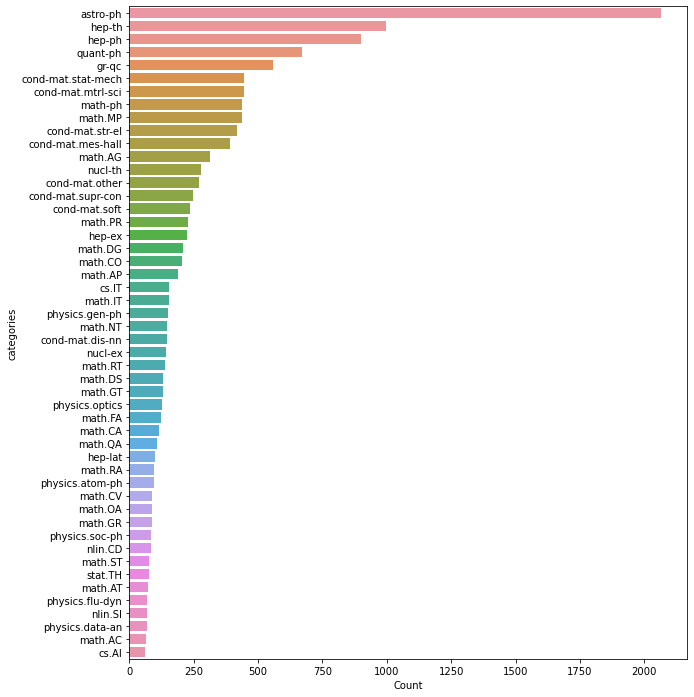

In [92]:
# source: https://www.analyticsvidhya.com/blog/2019/04/predicting-movie-genres-nlp-multi-label-classification/
g = all_cats_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(10,12)) 
ax = sns.barplot(data=g, x= "Count", y = "categories")
plt.show()

In [93]:
num_cats = [len(df_10k['cats_split'][row]) for row in range(len(df_10k['cats_split']))]

In [97]:
np.mean(num_cats)

1.5062

Text(0, 0.5, 'number of categories')

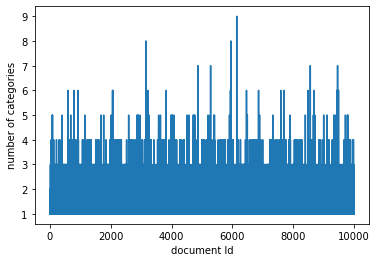

In [98]:
plt.plot(num_cats)
plt.xlabel('document Id')
plt.ylabel('number of categories')

Text(0, 0.5, 'count')

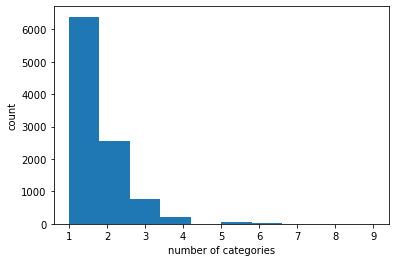

In [100]:
plt.hist(num_cats)
plt.xlabel('number of categories')
plt.ylabel('count')

In [127]:
df_10k['split_abstract'] = df_10k['abstract'].str.split()

In [128]:
len_of_abstracts = df_10k['split_abstract'].str.len()

<AxesSubplot:>

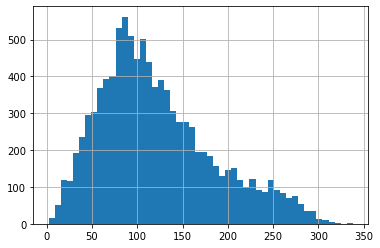

In [129]:
len_of_abstracts.hist(bins=50)

In [130]:
max(len_of_abstracts)

338

## Automatic tagging

In [ ]:
# BOW, TFIDF
# fastText Embeddings
# transformers

In [165]:
df_20k['categories'] = df_20k['categories'].str.split(' ')

In [167]:
df_20k['general_category'] = df_20k['categories'].apply(lambda x:[a.split('.')[0] for a in x])

In [168]:
df_20k.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,general_category
0,704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,[hep-ph],NaN,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[['Balázs', 'C.', ''], ['Berger', 'E. L.', '']...",[hep-ph]
1,704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,NaN,NaN,NaN,"[math.CO, cs.CG]",http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[['Streinu', 'Ileana', ''], ['Theran', 'Louis'...","[math, cs]"
2,704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",NaN,NaN,NaN,[physics.gen-ph],NaN,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[['Pan', 'Hongjun', '']]",[physics]
3,704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,NaN,NaN,NaN,[math.CO],NaN,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[['Callan', 'David', '']]",[math]
4,704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,NaN,"Illinois J. Math. 52 (2008) no.2, 681-689",NaN,NaN,"[math.CA, math.FA]",NaN,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[['Abu-Shammala', 'Wael', ''], ['Torchinsky', ...","[math, math]"


In [103]:
unique_cat = df_20k['general_category'].map(set)
cats = df_20k['general_category'].sum()
unique_cats = set(cats)
len(unique_cats)

19

In [105]:
all_cats = nltk.FreqDist(cats) 
all_cats_df = pd.DataFrame({'categories': list(all_cats.keys()), 
                              'Count': list(all_cats.values())})

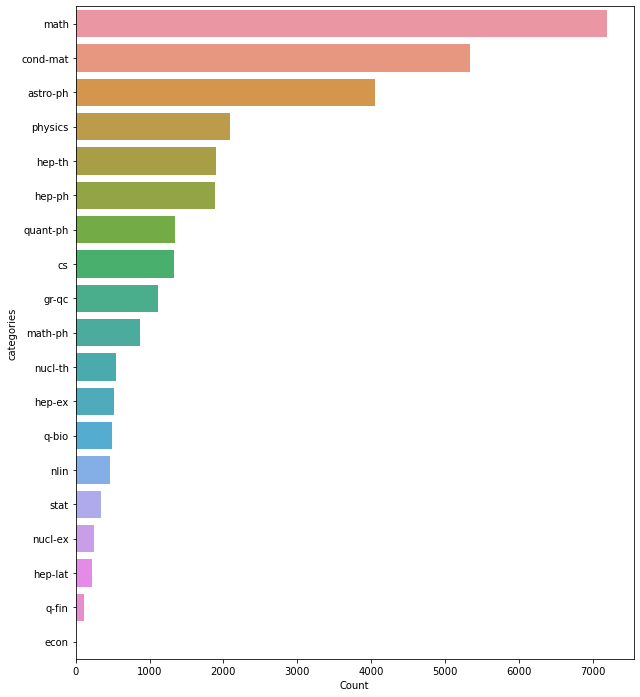

In [106]:
g = all_cats_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(10,12)) 
ax = sns.barplot(data=g, x= "Count", y = "categories")
plt.show()

In [196]:
g

,categories,Count
1,math,7198
4,cond-mat,5341
6,astro-ph,4054
3,physics,2088
7,hep-th,1907
0,hep-ph,1882
11,quant-ph,1342
2,cs,1334
5,gr-qc,1109
14,math-ph,870


In [175]:
df_20k.to_pickle('../input/arxiv_20krows_train.pkl')

In [42]:
import os
import sys

dir_path = os.path.dirname(os.getcwd())
SRC_PATH = os.path.join(dir_path, "src")

sys.path.append(SRC_PATH)

In [182]:
a= [1,2]
b= [1,2,3,4]

In [192]:
m = [lambda x:a for x in a if x in b]

In [195]:
m[1]

<function __main__.<listcomp>.<lambda>(x)>

## loading data using Dask

In [1]:
import dask.bag as db
import json

docs = db.read_text('../input/archive/arxiv-metadata-oai-snapshot.json').map(json.loads)

In [2]:
docs

dask.bag<loads, npartitions=1>

In [3]:
docs.count().compute()

1974617

In [ ]:
docs.take(1)

In [203]:
docs.take(1)

({'id': '0704.0001',
  'submitter': 'Pavel Nadolsky',
  'authors': "C. Bal\\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan",
  'title': 'Calculation of prompt diphoton production cross sections at Tevatron and\n  LHC energies',
  'comments': '37 pages, 15 figures; published version',
  'journal-ref': 'Phys.Rev.D76:013009,2007',
  'doi': '10.1103/PhysRevD.76.013009',
  'report-no': 'ANL-HEP-PR-07-12',
  'categories': 'hep-ph',
  'license': None,
  'abstract': '  A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resummation of initial-state gluon radiation valid at\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\nspecified in which the calculation is most reliable. Good agreement is\ndemonstrated with d

In [4]:
# Submissions by datetime
get_latest_version = lambda x: x['versions'][-1]['created']

In [7]:
# get only necessary fields
trim = lambda x: {'id': x['id'],
                  'title': x['title'],
                  'category':x['categories'].split(' '),
                  'abstract':x['abstract']}
# filter for papers published on or after 2020-01-01
columns = ['id','category','abstract']
docs_df = (docs
             .filter(lambda x: int(get_latest_version(x).split(' ')[3]) > 2020)
             .map(trim)
             .compute())

# convert to pandas
docs_df = pd.DataFrame(docs_df)

# add general category. we are going to use as our target variable
docs_df['general_category'] = docs_df.category.apply(lambda x:[a.split('.')[0] for a in x])

In [8]:
docs_df

,id,title,category,abstract,general_category
0,0704.0479,The affine part of the Picard scheme,"[math.AG, math.KT]",We describe the maximal torus and maximal un...,"[math, math]"
1,0705.4060,C*- Algebras and Thermodynamic Formalism,"[math.DS, math.OA]",We present a detailed exposition (for a Dyna...,"[math, math]"
2,0706.2239,Infinitesimal Castelnuovo Theory in Abelian Va...,[math.AG],The purpose of this article is to show that ...,[math]
3,0706.3282,Unified products for braided Lie bialgebras. A...,"[math.QA, math.RA]",We construct unified products for braided Li...,"[math, math]"
4,0707.4296,Infrared renormalization of two-loop integrals...,[hep-ph],We describe details of the renormalization o...,[hep-ph]
...,...,...,...,...,...
201334,physics/0701101,Submitting Jobs on Grid,[physics.comp-ph],This is an user's introduction to grid using...,[physics]
201335,physics/0701308,Boltzmann's Concept of Reality,"[physics.hist-ph, gr-qc, physics.pop-ph, physi...",In this article we describe and analyze the ...,"[physics, gr-qc, physics, physics]"
201336,physics/9903027,Matter and Space with Torsion,"[physics.gen-ph, physics.class-ph]",General equations of the unified field theor...,"[physics, physics]"
201337,quant-ph/0010065,Artificial Orbitals and a Solution to Grover's...,[quant-ph],By allowing measurements of observables othe...,[quant-ph]


In [12]:
# convert general category into label columns
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(docs_df.general_category)
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [13]:
# concatenate with the abstracts
df = pd.concat([docs_df[['abstract','title']], pd.DataFrame(labels)], axis=1)
df.columns = ['abstract','title'] + list(mlb.classes_)
df.head(4)

,abstract,title,astro-ph,cond-mat,cs,econ,eess,gr-qc,hep-ex,hep-lat,...,math,math-ph,nlin,nucl-ex,nucl-th,physics,q-bio,q-fin,quant-ph,stat
0,We describe the maximal torus and maximal un...,The affine part of the Picard scheme,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,We present a detailed exposition (for a Dyna...,C*- Algebras and Thermodynamic Formalism,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,The purpose of this article is to show that ...,Infinitesimal Castelnuovo Theory in Abelian Va...,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,We construct unified products for braided Li...,Unified products for braided Lie bialgebras. A...,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [14]:
# sample and keep columns that have at least 1 positive example
sample_df = df.sample(frac = 0.5, random_state = 4)
keep = sample_df.iloc[:,2:].apply(sum) > 1
sample_df = pd.concat([sample_df.iloc[:,:2],sample_df.iloc[:,2:].iloc[:,keep.values]], axis = 1)

categories = sample_df.columns[2:]

# removed categories
print('Removed following categories from training : {}'.format(str(keep[~keep].index.to_list())))

Removed following categories from training : []


In [28]:
sample_df

,abstract,title,astro-ph,cond-mat,cs,econ,eess,gr-qc,hep-ex,hep-lat,...,math,math-ph,nlin,nucl-ex,nucl-th,physics,q-bio,q-fin,quant-ph,stat
134965,Distributed minimax estimation and distribut...,Distributed Nonparametric Function Estimation:...,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
193114,Randomized response techniques (RRT) are use...,A Shiny Application for Conducting Electronic ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
93216,This paper investigates numerical methods fo...,Short-Term Behavior of a Geothermal Energy Sto...,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
122087,The application of drag-control strategies o...,Decomposition of the mean friction drag on a N...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
145443,Deep neural networks (DNN) have an impressiv...,Solving inverse problems with deep neural netw...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73102,The convolutional neural network (CNN) is vu...,Group-wise Inhibition based Feature Regulariza...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40673,If the mysterious Fermi-LAT GeV gamma-ray ex...,The Galactic bulge millisecond pulsars shining...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38805,We consider the longitudinal dynamical two-p...,A thermal form factor series for the longitudi...,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
197293,We construct hadronic amplitudes for the thr...,Patterns of $C$- and $CP$-violation in hadroni...,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [18]:
# plot paper distribution by category
source = pd.DataFrame(sample_df.iloc[:,2:].apply(sum)).reset_index().rename(columns = {0:'count'})
ptotalText = alt.Text('PercentOfTotal:Q', format = '.2%')

chart = alt.Chart(source).transform_joinaggregate(
    TotalPapers='sum(count)',
).transform_calculate(
    PercentOfTotal="datum.count / datum.TotalPapers"
).mark_bar().encode(
    x = 'index',
    y = 'count',
    tooltip = ['index','count', ptotalText]
).properties(
    title='arXiv Papers by Category, after 2021-01-01',
    width = 800
)

# add percentage labels
chart = chart + chart.mark_text(
    align='center',
    baseline='middle',
    dx= 3,  # Nudges text to right so it doesn't appear on top of the bar,
    dy = -5
).encode(
    text = ptotalText
) 

chart

alt.LayerChart(...)

In [65]:
sample_df.to_pickle('../input/sample_df_2021.pkl')

In [69]:
import train
from train import train_model

In [70]:
import importlib
importlib.reload(train)

<module 'train' from '/home/motare/works/codes/arxiv_interface/src/train.py'>

In [71]:
train_model(3, 'n_bayes')

/home/motare/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2956
           1       0.75      0.79      0.77      3695
           2       0.86      0.89      0.88     13885
           3       0.25      0.00      0.01       358
           4       0.54      0.51      0.53      2553
           5       0.73      0.74      0.73      1157
           6       0.48      0.60      0.54       540
           7       1.00      0.03      0.05       183
           8       0.70      0.78      0.74      1413
           9       0.63      0.66      0.64      1401
          10       0.84      0.82      0.83      9437
          11       0.41      0.10      0.16       880
          12       1.00      0.01      0.03       347
          13       0.45      0.19      0.27       237
          14       0.49      0.32      0.39       450
          15       0.53      0.48      0.50      3545
          16       0.78      0.11      0.19       598
          17       0.82    

/home/motare/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2941
           1       0.74      0.78      0.76      3549
           2       0.86      0.89      0.87     13924
           3       0.50      0.00      0.01       380
           4       0.53      0.49      0.51      2510
           5       0.71      0.72      0.71      1149
           6       0.49      0.60      0.54       553
           7       1.00      0.03      0.05       186
           8       0.69      0.77      0.73      1409
           9       0.63      0.66      0.64      1348
          10       0.84      0.83      0.83      9391
          11       0.44      0.11      0.17       855
          12       1.00      0.01      0.01       393
          13       0.53      0.23      0.32       246
          14       0.52      0.35      0.42       457
          15       0.54      0.48      0.51      3586
          16       0.70      0.10      0.18       611
          17       0.73    

/home/motare/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2881
           1       0.74      0.78      0.76      3608
           2       0.87      0.89      0.88     13977
           3       0.44      0.01      0.02       354
           4       0.56      0.50      0.53      2521
           5       0.68      0.70      0.69      1161
           6       0.52      0.57      0.55       573
           7       1.00      0.03      0.07       208
           8       0.67      0.73      0.70      1413
           9       0.65      0.66      0.66      1422
          10       0.84      0.82      0.83      9345
          11       0.40      0.11      0.17       891
          12       1.00      0.00      0.01       356
          13       0.56      0.22      0.32       235
          14       0.46      0.34      0.39       412
          15       0.54      0.47      0.50      3629
          16       0.61      0.09      0.16       612
          17       0.82    

## Title Generating

## Article recommender